In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"F:\python\Surprise")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'comqt.csv',
 'con_lap.csv',
 'entire_data.csv',
 'Laptop.csv',
 'Laptops.csv',
 'London_postal_codes.csv',
 'Master Case Study-2.pdf',
 'pos comb.csv',
 'POS_Q1 (Autosaved).csv',
 'POS_Q1.csv',
 'POS_Q2.csv',
 'POS_Q3.csv',
 'POS_Q4.csv',
 'quters',
 'solution.ipynb',
 'Store_Locations.csv']

In [4]:
pos1=pd.read_csv(r"POS_Q1.csv")

In [5]:
pos2=pd.read_csv(r'POS_Q2.csv')

In [6]:
pos3=pd.read_csv(r'POS_Q3.csv')

In [7]:
pos4=pd.read_csv(r'POS_Q4.csv')

In [8]:
store_loc=pd.read_csv(r'Store_Locations.csv')

In [9]:
lap=pd.read_csv(r'Laptop.csv')

In [10]:
lp_code=pd.read_csv(r'London_postal_codes.csv')

In [11]:
pos1.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'month'],
      dtype='object')

In [12]:
# pos1[["Retail Price"]].mean()

In [13]:
# pos2[["Retail Price"]].mean()

In [14]:
# pos3[["Retail Price"]].mean()

In [15]:
# pos4[["Retail Price"]].mean()

In [16]:
com_qt2=pos1.append(pos2)

In [17]:
# val=[486.23,486.22,518.24,498.94]
# qrt=["q1","q2","q3","q4"]

In [18]:
comqt3=com_qt2.append(pos3)

In [19]:
comqt=comqt3.append(pos4)

# qestion_1 Pricing

### A

In [20]:
qts=comqt.groupby(["month"]).agg({"Retail Price":["mean"]})

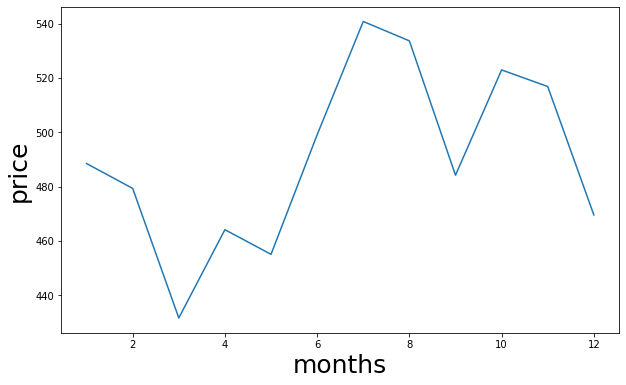

In [21]:
plt.figure(figsize=(10,6))
plt.plot(qts)
plt.xlabel("months",fontsize=25)
plt.ylabel("price",fontsize=25)

plt.show()


# In above figure  we can analyse that initially pricies are declining from the begining of the year  to the march, 
# after the month of march they are exponentially rising and reached their peak at the 7th month.
# After the 7th month prices have been declined till the end of the year.

### B

In [22]:
store_loc

,Postcode,OS X,OS Y,Lat,Long
0,CR7 8LE,532714,168302,51.398236,-0.093658
1,E2 0RY,535652,182961,51.529272,-0.045831
2,E7 8NW,541428,184515,51.541820,0.038004
3,KT2 5AU,517917,170243,51.418947,-0.305610
4,N17 6QA,533788,189994,51.593024,-0.069979
5,N3 1DH,525109,190628,51.600873,-0.194738
6,NW5 2QH,529248,185213,51.551011,-0.137272
7,SE1 2BN,534057,179682,51.500186,-0.070057
8,SE8 3JD,537175,177885,51.483291,-0.025862
9,SW12 9HD,528739,173080,51.442091,-0.149031


In [23]:
x=comqt.pivot_table(index=["Store Postcode"],values="Retail Price")


In [24]:
xy=x.reset_index()

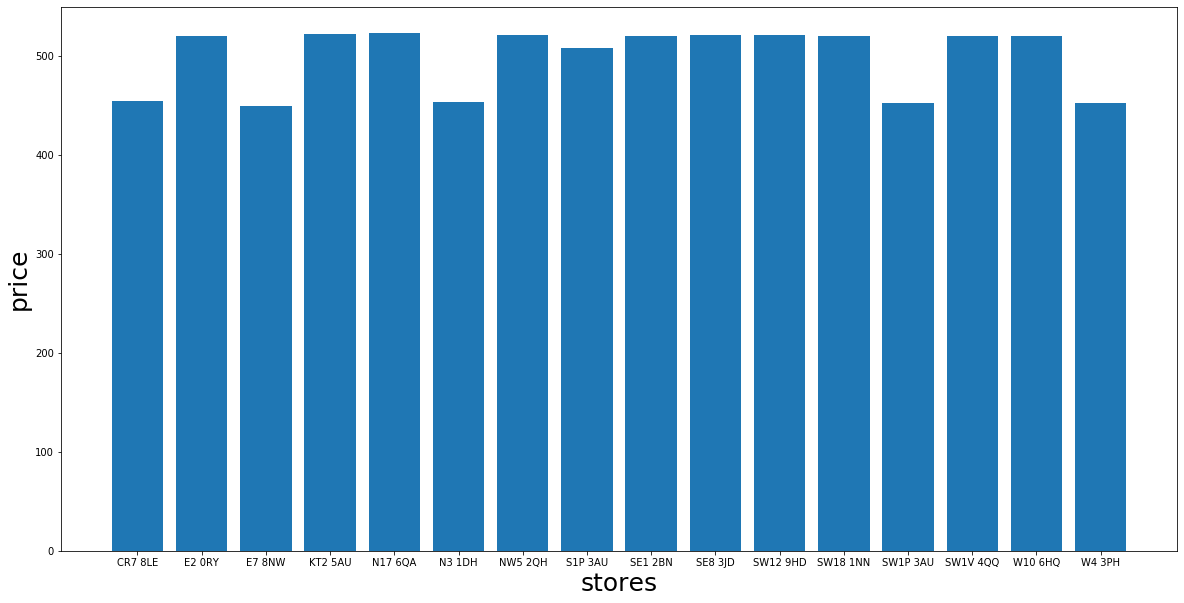

In [25]:
plt.figure(figsize=(20,10))
plt.bar(xy["Store Postcode"],xy["Retail Price"])
plt.xlabel("stores",fontsize=(25))
plt.ylabel("price",fontsize=(25))
plt.show()

### we can see in above figure that prices are consistent at almost every store postcode, although there are very little fluctuations in prices. 

### C

In [26]:
x=comqt.pivot_table(index=["Configuration"],values="Retail Price")

In [27]:
x

,Retail Price
Configuration,
1,332.347744
2,284.988189
3,372.306569
4,323.209738
5,385.290323
...,...
860,711.745455
861,778.366864
862,725.220339


In [28]:
res=x.reset_index()

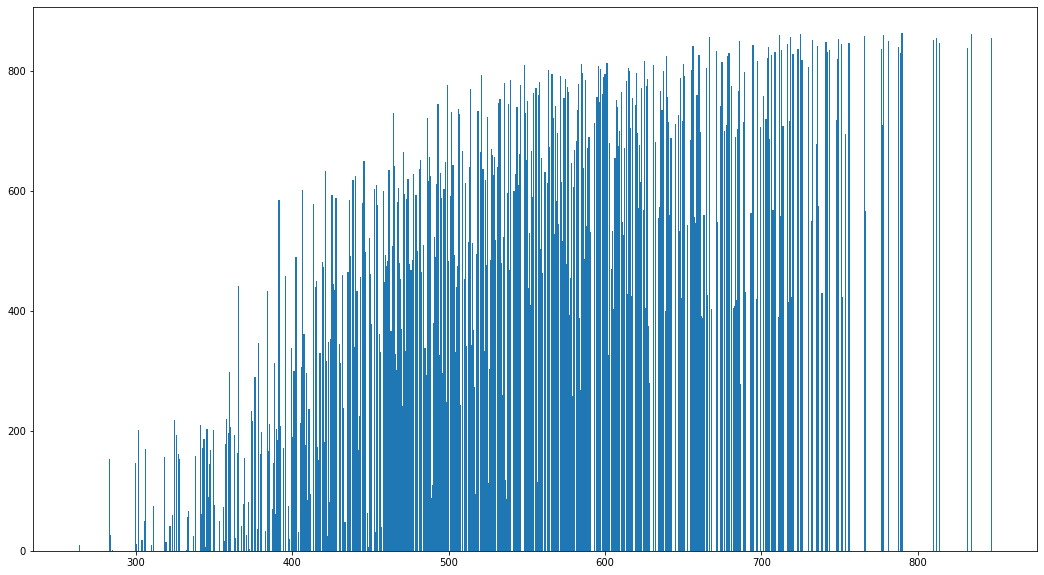

In [29]:
plt.figure(figsize=(18,10))
plt.bar(res["Retail Price"],res["Configuration"])
# plt.xlabel("price",fontsize=10)
# plt.ylabel("config",fontsize=10)
plt.show()

# res=res.plot(figsize=(8,8),kind="bar")
# res.set_xlabel("price")
# res.set_ylabel("Configuration")


## In the given graphical fig we are getting that there is mostly positive pattern between price and configuration to certain level,
## after passing that certain level relation between price and configuration getting a curve and goes in straight horizontal way.

# question2 stores

# Q1

In [30]:
pos=pd.read_csv(r'pos comb.csv')
pos[["postx","posty"]]

F:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,postx,posty
0,532041,180995
1,529240,175537
2,533095,181047
3,529902,179641
4,531684,180948
...,...,...
297567,533595,180025
297568,531165,192973
297569,534086,168521
297570,530716,177488


### these are the locations where cutomer are located

In [31]:
pos[["x","y"]]

,x,y
0,534057,179682
1,528739,173080
2,535652,182961
3,534057,179682
4,528924,178440
...,...,...
297567,529902,179641
297568,525109,190628
297569,532714,168302
297570,529902,179641


### these are the locations where stores are located

In [32]:
# lap_join=pd.merge(comqt,lap, on="Configuration",how="left")

In [33]:
# vis=lap_join.pivot_table(index=["Configuration"],values="Retail Price")

In [34]:
# vis=vis.reset_index()

In [35]:
# plt.bar(vis['Retail Price'],vis["Configuration"])
# plt.show()

In [36]:
# com_lap=pd.merge(comqt,lap,on="Configuration",how="inner")


### Q 2

In [37]:
x=comqt.groupby(["Store Postcode"]).count()

In [38]:
x=x.reset_index()

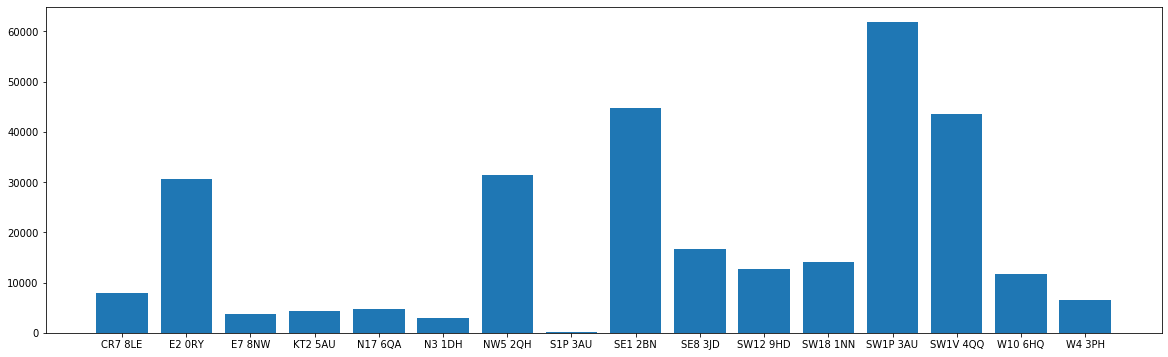

In [39]:
plt.figure(figsize=(20,6))
plt.bar(x["Store Postcode"],x["Configuration"])
plt.show()

In [77]:
# con = x.plot(figsize=(8,8))
# con.set_xlabel("Stores")
# con.set_ylabel("Sales")
# plt.show()


### Above graph demonstrate  that "SWIP 3AU" ,"E2 0RY", " NW5 2QH","SE1 2BN", "SW1V 4QQ" are selling the most laptop .

### Question3

In [41]:
os.listdir()

['.ipynb_checkpoints',
 'comqt.csv',
 'con_lap.csv',
 'entire_data.csv',
 'Laptop.csv',
 'Laptops.csv',
 'London_postal_codes.csv',
 'Master Case Study-2.pdf',
 'pos comb.csv',
 'POS_Q1 (Autosaved).csv',
 'POS_Q1.csv',
 'POS_Q2.csv',
 'POS_Q3.csv',
 'POS_Q4.csv',
 'quters',
 'solution.ipynb',
 'Store_Locations.csv']

In [42]:
pos=pd.read_csv(r'pos comb.csv')

F:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
pos_dis= pos.groupby(["Customer Postcode"]).agg({'sqrt':["sum"]})

In [44]:
pos[["sqrt"]].mean()

sqrt    3687.614658
dtype: float64

In [45]:
pos_dis=pos_dis.reset_index()

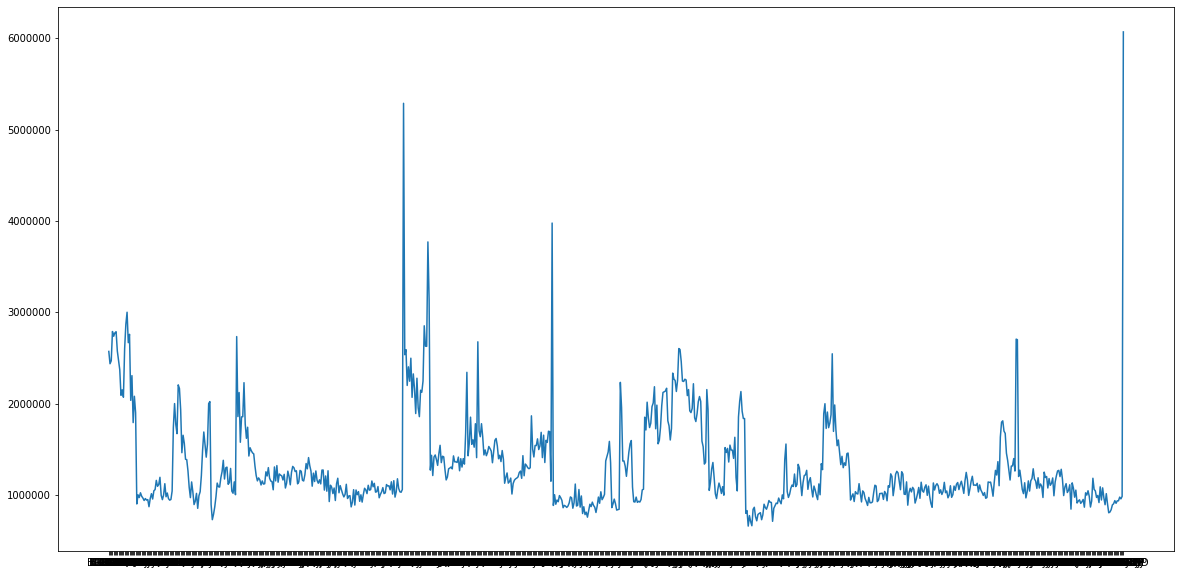

In [46]:
plt.figure(figsize=(20,10))
plt.plot(pos_dis["Customer Postcode"],pos_dis["sqrt"])
plt.show()



### Above graph shows the total distance travelled by the each customer from different customer post code 

# Q 3 Configuration

### 2

In [47]:
x=comqt.groupby(["Store Postcode"]).agg({"Store Postcode":["count"]})

In [48]:
y=comqt.groupby("Configuration").agg({"Configuration":["count"]})

In [49]:
x.reset_index()

Store Postcode       
                   count
0         CR7 8LE   7837
1          E2 0RY  30707
2          E7 8NW   3796
3         KT2 5AU   4337
4         N17 6QA   4743
5          N3 1DH   3011
6         NW5 2QH  31405
7         S1P 3AU    148
8         SE1 2BN  44656
9         SE8 3JD  16595
10       SW12 9HD  12684
11       SW18 1NN  14076
12       SW1P 3AU  61831
13       SW1V 4QQ  43472
14        W10 6HQ  11733
15         W4 3PH   6541

In [50]:
y.reset_index()

Configuration      
                  count
0               1   266
1               2   254
2               3   274
3               4   267
4               5   248
..            ...   ...
859           860   165
860           861   169
861           862   177
862           863   154
863           864   156

[864 rows x 2 columns]

In [51]:

sor=comqt.pivot_table(index=["Configuration","Store Postcode"])


In [52]:
constore=sor.reset_index()

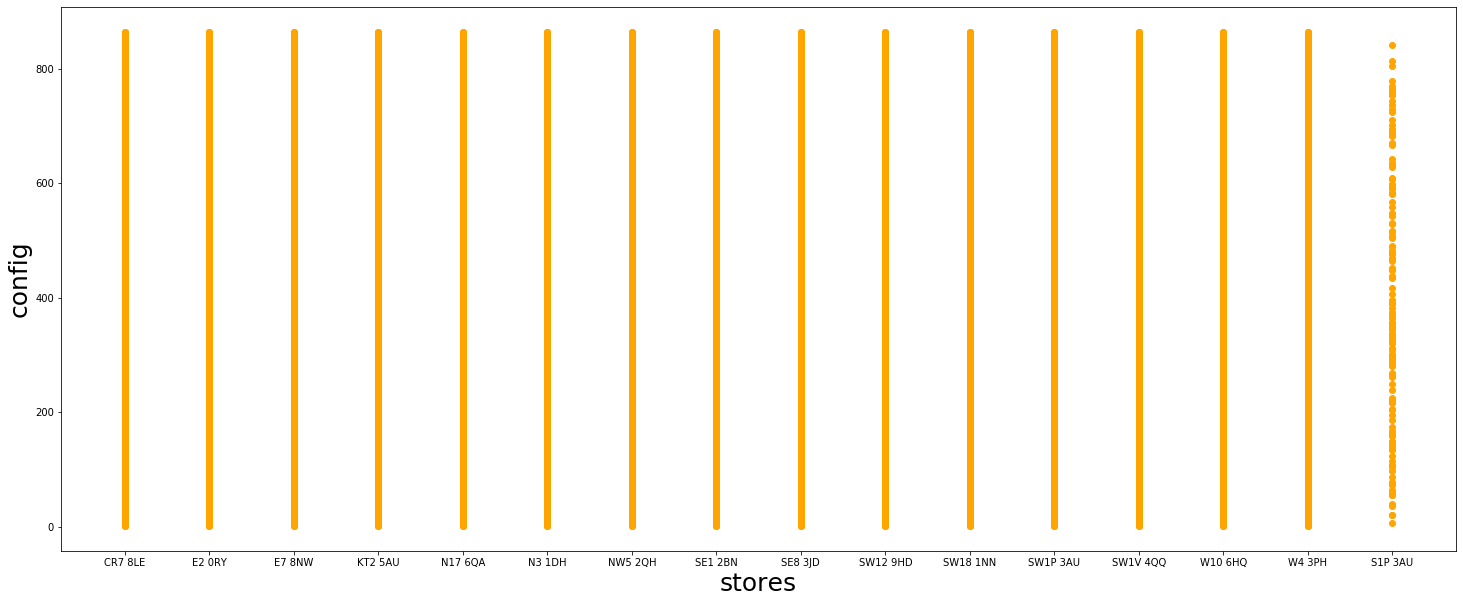

In [53]:
plt.figure(figsize=(25,10))
plt.scatter(constore["Store Postcode"],constore["Configuration"],color="orange")
plt.xlabel("stores",fontsize=(25))
plt.ylabel("config",fontsize=(25))
plt.show()

#  No, all stores do not sell every configuration, as we can see in above graph there are splits in last which shows that store "SIP 3AU"
# does not sell some cofigurations.

# q1

In [54]:
comqt

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,month
0,01-01-2013 00:01,163,EC4V 5BH,SE1 2BN,455.0,1
1,01-01-2013 00:02,320,SW4 0JL,SW12 9HD,545.0,1
2,01-01-2013 00:04,23,EC3V 1LR,E2 0RY,515.0,1
3,01-01-2013 00:04,169,SW1P 3AU,SE1 2BN,395.0,1
4,01-01-2013 00:06,365,EC4V 4EG,SW1V 4QQ,585.0,1
...,...,...,...,...,...,...
114464,12/30/2013 23:55,703,SE1 2UP,SW1P 3AU,535.5,12
114465,12/30/2013 23:55,731,N13 4JD,N3 1DH,392.0,12
114466,12/30/2013 23:57,375,SE25 6EF,CR7 8LE,441.0,12
114467,12/30/2013 23:58,101,SW8 1LA,SW1P 3AU,406.0,12


In [55]:
lap

,Configuration,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,Quarter
0,1,15,4,1,1.5,Yes,40,Yes,1
1,2,15,4,1,1.5,Yes,40,No,1
2,3,15,4,1,1.5,Yes,80,Yes,1
3,4,15,4,1,1.5,Yes,80,No,1
4,5,15,4,1,1.5,Yes,120,Yes,1
...,...,...,...,...,...,...,...,...,...
859,860,17,6,4,2.4,No,80,No,0
860,861,17,6,4,2.4,No,120,Yes,0
861,862,17,6,4,2.4,No,120,No,0
862,863,17,6,4,2.4,No,300,Yes,0


In [56]:
config_lap=pd.merge(comqt,lap,on="Configuration",how="inner")

In [57]:
# details=config_lap.pivot_table(index=["Configuration","Retail Price"],aggfunc="sum")

In [58]:
details=config_lap.groupby(["Configuration","Battery Life (Hours)","HD Size (GB)","Processor Speeds (GHz)","Quarter","RAM (GB)","Screen Size (Inches)"]).agg({"Retail Price":["sum","mean"]})

In [59]:
details=details.reset_index()

In [60]:
details[details["Configuration"]==12]

Configuration Battery Life (Hours) HD Size (GB) Processor Speeds (GHz)  \
                                                                            
11            12                    4           80                    1.5   

   Quarter RAM (GB) Screen Size (Inches) Retail Price              
                                                  sum        mean  
11       1        1                   15      69877.0  299.901288

In [61]:
details

Configuration Battery Life (Hours) HD Size (GB) Processor Speeds (GHz)  \
                                                                             
0               1                    4           40                    1.5   
1               2                    4           40                    1.5   
2               3                    4           80                    1.5   
3               4                    4           80                    1.5   
4               5                    4          120                    1.5   
..            ...                  ...          ...                    ...   
859           860                    6           80                    2.4   
860           861                    6          120                    2.4   
861           862                    6          120                    2.4   
862           863                    6          300                    2.4   
863           864                    6          300                    2.4   

    Quarter RAM (GB) Screen Size (Inches) Retail Price              
                                                   sum        mean  
0         1        1                   15      88404.5  332.347744  
1         1        1                   15      72387.0  284.988189  
2         1        1                   15     102012.0  372.306569  
3         1        1                   15      86297.0  323.209738  
4         1        1                   15      95552.0  385.290323  
..      ...      ...                  ...          ...         ...  
859       0        4                   17     117438.0  711.745455  
860       0        4                   17     131544.0  778.366864  
861       0        4                   17     128364.0  725.220339  
862       0        4                   17     128499.0  834.409091  
863       0        4                   17     123246.0  790.038462  

[864 rows x 9 columns]

In [62]:
os.listdir()

['.ipynb_checkpoints',
 'comqt.csv',
 'con_lap.csv',
 'entire_data.csv',
 'Laptop.csv',
 'Laptops.csv',
 'London_postal_codes.csv',
 'Master Case Study-2.pdf',
 'pos comb.csv',
 'POS_Q1 (Autosaved).csv',
 'POS_Q1.csv',
 'POS_Q2.csv',
 'POS_Q3.csv',
 'POS_Q4.csv',
 'quters',
 'solution.ipynb',
 'Store_Locations.csv']

In [63]:
config_laptop=pd.read_csv(r'con_lap.csv')

F:\conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
uniq=config_laptop.groupby("unique_id").count()

In [65]:
uniq=uniq.reset_index()

In [66]:
# config_laptop

# question Revenue

### A

In [67]:
comqt

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,month
0,01-01-2013 00:01,163,EC4V 5BH,SE1 2BN,455.0,1
1,01-01-2013 00:02,320,SW4 0JL,SW12 9HD,545.0,1
2,01-01-2013 00:04,23,EC3V 1LR,E2 0RY,515.0,1
3,01-01-2013 00:04,169,SW1P 3AU,SE1 2BN,395.0,1
4,01-01-2013 00:06,365,EC4V 4EG,SW1V 4QQ,585.0,1
...,...,...,...,...,...,...
114464,12/30/2013 23:55,703,SE1 2UP,SW1P 3AU,535.5,12
114465,12/30/2013 23:55,731,N13 4JD,N3 1DH,392.0,12
114466,12/30/2013 23:57,375,SE25 6EF,CR7 8LE,441.0,12
114467,12/30/2013 23:58,101,SW8 1LA,SW1P 3AU,406.0,12


In [68]:
revenue=comqt.groupby(["Store Postcode"]).agg({"Configuration":["count"],"Retail Price":["sum"]}).reset_index()

In [69]:
revenue

,Store Postcode,Configuration,Retail Price
,,count,sum
0,CR7 8LE,7837,3561172.5
1,E2 0RY,30707,15972845.0
2,E7 8NW,3796,1705393.0
3,KT2 5AU,4337,2261810.0
4,N17 6QA,4743,2480320.0
5,N3 1DH,3011,1363559.5
6,NW5 2QH,31405,16364055.0
7,S1P 3AU,148,75236.0
8,SE1 2BN,44656,23220815.0


In [70]:
# plt.figure(figsize=(15,10))
# plt.scatter(revenue["Configuration"],revenue["Retail Price"])
# plt.xlabel("config")
# plt.ylabel("price in lakh")
# plt.legend()
# plt.show()

In [71]:
# plt.plot(revenue["Configuration"],revenue["Retail Price"], label = "line 1",color="red")
# plt.plot(revenue["Configuration"],revenue["Retail Price"], label = "line 2",color="yellow")
# plt.legend()
# plt.show()

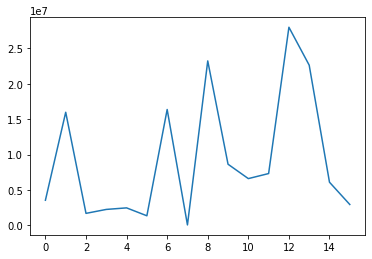

In [72]:
plt.plot(revenue["Retail Price"])
plt.show()

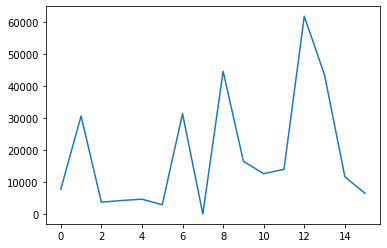

In [73]:
plt.plot(revenue["Configuration"])
plt.show()

In [74]:
x =revenue["Store Postcode"]
y1 = revenue["Configuration"]
y2 = revenue["Retail Price"]


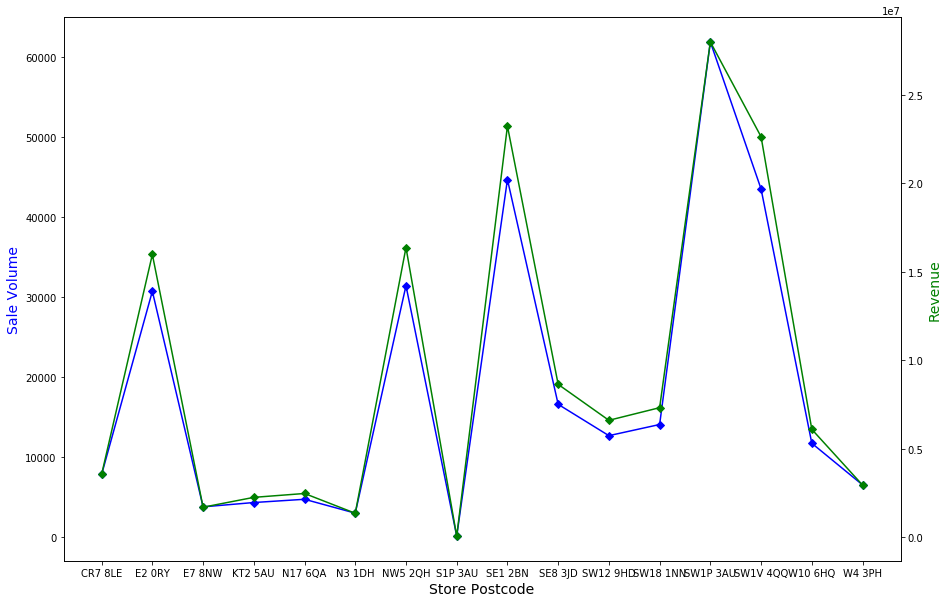

In [75]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(x, y1, color="blue", marker="D")

ax.set_xlabel("Store Postcode",fontsize=14)

ax.set_ylabel("Sale Volume",color="blue",fontsize=14)



ax2=ax.twinx()
ax2.plot(x, y2,color="green",marker="D",label=("revenue"))
ax2.set_ylabel("Revenue",color="green",fontsize=14)

plt.show()



## sales volume and revenue both are complemantary , both variables have a positive relation.

## B


### from the graph in part(a) we can determine that totlal count of each configuration sold  at every store gives the sales volume , we can say that configuration is positivily related to the sales revenue ,it effects positively.